# Two Feldspar thermometry
- First, we consider analyses of touching Kspar-Plag pairs
- Then we consider the situation common in lavas where you have a lot of individual Plag-Kspar crystals, and you want to assess all possible combinations from a single sample or deposit
- You can download the excel spreadsheet this reads from here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Feldspar_Thermobarometry/Two_Feldspar_input.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

### Import python things and set plotting parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Example 1 - Combining all possible Plag-Kspar Pairs
- Say you don't have touching Plag-Kspar pairs, but instead a list of Kspar compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Plag compositions in another sheet
- The functions ending in "_matching" in Thermobar consider all possible combinations of Plags and Kspars


### Import Kspars

In [3]:
out2=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Kspar")
Kspars2=out2['Kspars']
Kspars2.head()

,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar
0,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0,1
1,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0,2
2,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0,3
3,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0,4
4,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0,5


### Import plags

In [4]:
out3=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Plag")
Plags3=out3['Plags']
Plags3.head()

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0
1,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1
2,57.6,0.11,26.3,0.50,0,0.07,8.50,6.27,0.40,0,2
3,57.2,0.16,27.0,0.62,0,0.06,9.03,5.58,0.84,0,3
4,56.7,0.14,27.6,0.69,0,0.11,9.46,5.58,0.48,0,4


### Calculate T for all matches using equation 27a at 5 kbar

In [5]:
T_27a_5kbar_All=pt.calculate_plag_kspar_temp_matching(plag_comps=Plags3, kspar_comps=Kspars2, 
                                                      equationT="T_Put2008_eq27a", P=5)
T_27a_5kbar_All

Considering 77 Kspar-Plag pairs, be patient if this is >>1 million!


,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
0,0.295531,0.002892,-0.326051,0.638916,0.902959,0.322702,0.636023,0.607427,0.648754,1269.748822,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0,1,1.090135,0.000000,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.000000,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.036410,0.422555,0.541035,0.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.763208,1269.748822,5
1,-0.092624,0.110226,-0.329378,0.641223,0.956165,0.410594,0.530997,1.048788,0.739972,1197.800282,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0,2,1.088471,0.000000,0.000696,0.010521,0.380538,0.101002,0.244172,0.0,0.0,0.0,1.825399,0.596292,0.000000,0.000381,0.005764,0.208468,0.055332,0.133763,0.0,0.0,0.0,0.029579,0.283957,0.686464,1.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.512876,1197.800282,5
2,-2.324993,0.335739,0.000517,0.648692,1.149221,0.890109,0.312954,3.474214,0.889592,1013.354929,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0,3,1.075156,0.000000,0.001253,0.006955,0.368768,0.037109,0.314238,0.0,0.0,0.0,1.803480,0.596156,0.000000,0.000695,0.003856,0.204476,0.020577,0.174240,0.0,0.0,0.0,0.019410,0.103570,0.877020,2.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.187066,1013.354929,5
3,-1.933109,0.255822,-0.187706,0.645605,1.065363,0.647145,0.389783,2.998471,0.834851,1081.998018,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0,4,1.028555,0.000744,0.007098,0.011769,0.376615,0.055180,0.273897,0.0,0.0,0.0,1.753859,0.586453,0.000424,0.004047,0.006711,0.214735,0.031462,0.156168,0.0,0.0,0.0,0.034530,0.161891,0.803579,3.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.292404,1081.998018,5
4,0.064453,0.110505,-0.269422,0.643095,1.001463,0.498868,0.532590,0.937010,0.768290,1145.332986,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0,5,1.083478,0.000000,0.000696,0.006420,0.376615,0.092612,0.267527,0.0,0.0,0.0,1.827347,0.592924,0.000000,0.000381,0.003513,0.206099,0.050681,0.146402,0.0,0.0,0.0,0.017513,0.252653,0.729834,4.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,

### Examine equilibrium tests
- As it is currently unclear what delta values are acceptable, we leave it up to the users to investigate the experimental data, but provide an example here of how you can filter based on these values
- First, plot up the delta values to get an idea of the degree of disequilibrium

Text(0, 0.5, '# of measurements')

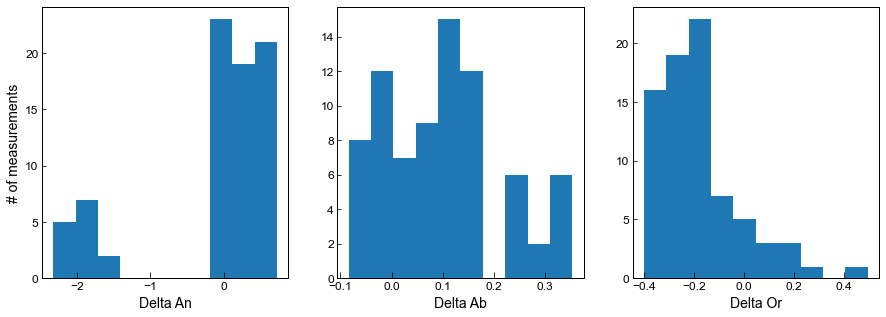

In [6]:
fig, ((ax0, ax1, ax2)) = plt.subplots(1,3, figsize = (15,5)) # adjust dimensions of figure here
ax0.hist(T_27a_5kbar_All['Delta_An'])
ax1.hist(T_27a_5kbar_All['Delta_Ab'])
ax2.hist(T_27a_5kbar_All['Delta_Or'])
ax0.set_xlabel('Delta An')
ax1.set_xlabel('Delta Ab')
ax2.set_xlabel('Delta Or')
ax0.set_ylabel('# of measurements')

### Filtering outputs
- Here we make filters, the "filt_a_..." considers all avlues of Delta An <1, and is a bool, so a series of true and false statements

In [7]:
# This says accept pairs within Delta An between +-1
filt_a_An=abs(T_27a_5kbar_All['Delta_An'])<1 

# This says accept pairs with Delta Ab between +-0.15
filt_a_Ab=abs(T_27a_5kbar_All['Delta_Ab'])<0.15 

# This says accept pairs with Delta Or between +-0.2
filt_a_Or=abs(T_27a_5kbar_All['Delta_Or'])<0.2 

### Apply filters
- Here, we apply these filters to only consider pairs meeting all 3 criteria above

In [8]:
# This filters pairs to only those meeting these three criteria defined above
Filt_pairs=T_27a_5kbar_All.loc[filt_a_An&filt_a_Ab&filt_a_Or] 
Filt_pairs

,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
7,0.483175,0.034127,-0.149859,0.645062,1.051235,0.611800,0.610935,0.568060,0.761658,1095.067777,64.9,0.0,18.6,0.00,0.0,0.00,0.17,3.02,12.10,0,8,1.080149,0.000000,0.000000,0.003032,0.364845,0.097453,0.256911,0.0,0.0,0.0,1.802390,0.599287,0.000000,0.000000,0.001682,0.202423,0.054069,0.142539,0.0,0.0,0.0,0.008482,0.272674,0.718843,7.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.492498,1095.067777,5
8,0.615621,-0.015126,-0.197861,0.643541,1.012541,0.522500,0.658666,0.396920,0.720361,1133.531892,66.0,0.0,18.9,0.05,0.0,0.00,0.18,3.73,11.30,0,9,1.098457,0.000000,0.000696,0.003210,0.370730,0.120364,0.239925,0.0,0.0,0.0,1.833381,0.599143,0.000000,0.000380,0.001751,0.202211,0.065651,0.130865,0.0,0.0,0.0,0.008830,0.331125,0.660044,8.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.59807,1133.531892,5
10,0.345956,0.076966,-0.124167,0.645848,1.071757,0.663643,0.568882,0.725801,0.787810,1076.240814,65.5,0.0,18.9,0.11,0.0,0.04,0.17,2.58,12.50,0,11,1.090135,0.000992,0.001531,0.003032,0.370730,0.083254,0.265404,0.0,0.0,0.0,1.815078,0.600599,0.000547,0.000844,0.001670,0.204250,0.045868,0.146222,0.0,0.0,0.0,0.008620,0.236726,0.754654,10.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.427569,1076.240814,5
18,0.512559,0.037062,-0.132206,0.637768,1.044104,0.627760,0.600706,0.531545,0.759966,1109.293338,64.9,0.0,18.6,0.00,0.0,0.00,0.17,3.02,12.10,0,8,1.080149,0.000000,0.000000,0.003032,0.364845,0.097453,0.256911,0.0,0.0,0.0,1.802390,0.599287,0.000000,0.000000,0.001682,0.202423,0.054069,0.142539,0.0,0.0,0.0,0.008482,0.272674,0.718843,7.0,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,1,0.525847,1109.293338,5
19,0.635801,-0.013936,-0.186124,0.635049,1.008142,0.531789,0.648985,0.372340,0.717913,1149.132699,66.0,0.0,18.9,0.05,0.0,0.00,0.18,3.73,11.30,0,9,1.098457,0.000000,0.000696,0.003210,0.370730,0.120364,0.239925,0.0,0.0,0.0,1.833381,0.599143,0.000000,0.000380,0.001751,0.202211,0.065651,0.130865,0.0,0.0,0.0,0.008830,0.331125,0.660044,8.0,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.